## Section 1 - What does the Happiness Score look like on a global level?

#### Library imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='Dsaks9', api_key='xoFCDE8rUpaajrOpa9ev')

#### Initial exploratory figures

Text(0,0.5,'Difference in Happiness Score')

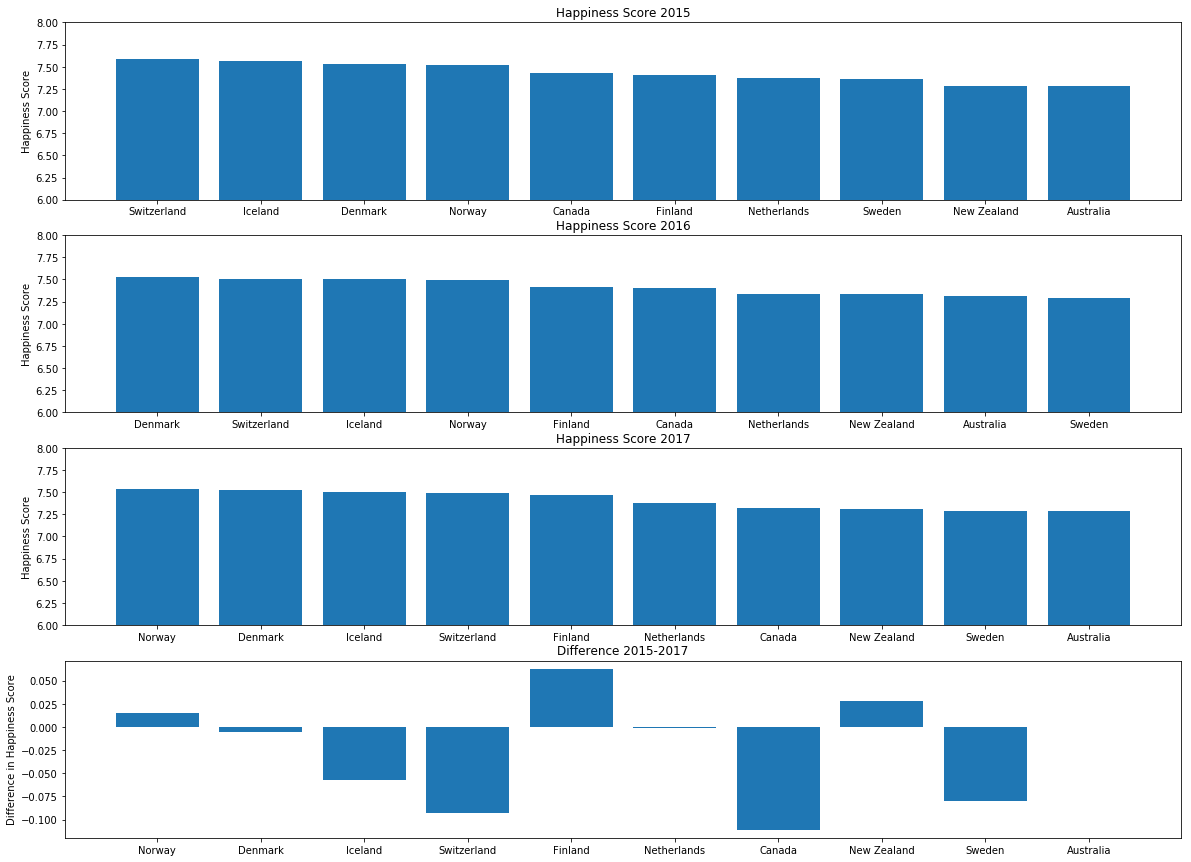

In [17]:
fig, ax = plt.subplots(4,1, figsize=(20,15))

ax[0].bar(happ_scr_over_time.sort_values(by=['Happiness_Score_2015'], ascending = False).index[0:10],
        happ_scr_over_time.sort_values(by=['Happiness_Score_2015'], ascending = False)['Happiness_Score_2015'].iloc[0:10]) 
ax[0].set_title('Happiness Score 2015')
ax[0].set_ylim([6,8])
ax[0].set_ylabel('Happiness Score')
                                                                                                                    
ax[1].bar(happ_scr_over_time.sort_values(by=['Happiness_Score_2016'], ascending = False).index[0:10],
        happ_scr_over_time.sort_values(by=['Happiness_Score_2016'], ascending = False)['Happiness_Score_2016'].iloc[0:10]) 
ax[1].set_title('Happiness Score 2016')
ax[1].set_ylim([6,8])
ax[1].set_ylabel('Happiness Score')

ax[2].bar(happ_scr_over_time.sort_values(by=['Happiness_Score_2017'], ascending = False).index[0:10],
        happ_scr_over_time.sort_values(by=['Happiness_Score_2017'], ascending = False)['Happiness_Score_2017'].iloc[0:10]) 
ax[2].set_title('Happiness Score 2017')
ax[2].set_ylim([6,8])
ax[2].set_ylabel('Happiness Score')

ax[3].bar(happ_scr_over_time.sort_values(by=['Happiness_Score_2017'], ascending = False).index[0:10],
        happ_scr_over_time.sort_values(by=['Happiness_Score_2017'], ascending = False)['Difference_2015_2017'].iloc[0:10]) 
ax[3].set_title('Difference 2015-2017')
ax[3].set_ylabel('Difference in Happiness Score')

#### Visualization 1: World Happiness Global Heat Map (2015)

In [3]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')

df_2015 = df_2015.set_index('Country')
df_2016 = df_2016.set_index('Country')
df_2017 = df_2017.set_index('Country')

country_codes = pd.read_csv('countries_codes_and_coordinates.csv')
country_codes = country_codes.set_index('Country')

countries_happiness_2015 = df_2015.index.tolist()
countries_happiness_2016 = df_2016.index.tolist()
countries_happiness_2017 = df_2017.index.tolist()

countries_happiness_abb_2015 = [country_codes['Alpha-3 code'].loc[country] for country in countries_happiness_2015 
                      if country in country_codes.index]
countries_happiness_abb_2016 = [country_codes['Alpha-3 code'].loc[country] for country in countries_happiness_2016 
                      if country in country_codes.index]
countries_happiness_abb_2017 = [country_codes['Alpha-3 code'].loc[country] for country in countries_happiness_2017 
                      if country in country_codes.index]

In [18]:
data_happiness_2015 = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = countries_happiness_abb_2015,
        z = df_2015['Happiness Score'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Happiness Score")
        ) ]

layout_happiness_2015 = dict(
        width = 1000,
        height = 500,
        title = '2015 World Happiness Score by Country<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='mercator', scale=1 ),
            showlakes = False,
            showframe = False,
            showcoastlines = False,
             ),
        margin = dict(
            l = 0,
            b = 0,
            r = 0,
            t = 100
        ))
    
fig_happiness_2015 = dict( data=data_happiness_2015, layout=layout_happiness_2015 )

py.iplot( fig_happiness_2015, filename='happiness_2015' )

In [20]:
data_happiness_2016 = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = countries_happiness_abb_2016,
        z = df_2016['Happiness Score'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Happiness Score")
        ) ]

layout_happiness_2016 = dict(
        title = '2016 World Happiness Score by Country<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='mercator' ),
            showlakes = False,
            showframe = False,
            showcoastlines = False,
            ),
            margin = dict(
            l = 0,
            b = 0,
            r = 0,
            t = 100
             ))

fig_happiness_2016 = dict( data=data_happiness_2016, layout=layout_happiness_2016 )

py.iplot( fig_happiness_2016, filename='happiness_2016' )

#### Visualization 2: World Happiness Global Heat Map (2017)

In [21]:
data_happiness_2017 = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = countries_happiness_abb_2017,
        z = df_2017['Happiness.Score'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Happiness Score")
        ) ]

layout_happiness_2017 = dict(
        title = '2017 World Happiness Score by Country<br>(Hover for breakdown)',
        geo = dict(
            projection=dict( type='mercator' ),
            showlakes = False,
            showframe = False,
            showcoastlines = False,
             ),
        margin = dict(
            l = 0,
            b = 0,
            r = 0,
            t = 100
             ))

fig_happiness_2017 = dict( data=data_happiness_2017, layout=layout_happiness_2017 )

py.iplot( fig_happiness_2017, filename='happiness_2017' )

## Section 2 - How do Happiness Scores and their sub-factors change across country and over time?

#### Visualization 3: World Happiness Rank for Top 10 Happiest Countries (2015-2017)

In [23]:
pd.options.display.float_format = '{:.3f}'.format

happ_scr_over_time = pd.concat([df_2015['Happiness Score'].rename('Happiness_Score_2015'),
                            df_2016['Happiness Score'].rename('Happiness_Score_2016'), 
                            df_2017['Happiness.Score'].rename('Happiness_Score_2017'),], axis=1, sort=False)

diff_scr_over_time = pd.concat([df_2015['Happiness Score'], df_2017['Happiness.Score']], axis=1, sort=False).diff(axis=1)

happ_scr_over_time = pd.concat([happ_scr_over_time, diff_scr_over_time['Happiness.Score'].rename('Difference_2015_2017')],axis=1, sort=False)

happ_rnk_over_time = pd.concat([df_2015['Happiness Rank'].rename('Happiness_Rank_2015'),
                            df_2016['Happiness Rank'].rename('Happiness_Rank_2016'), 
                            df_2017['Happiness.Rank'].rename('Happiness_Rank_2017'),], axis=1, sort=False)

diff_rnk_over_time = pd.concat([df_2015['Happiness Rank'], df_2017['Happiness.Rank']], axis=1, sort=False).diff(axis=1)

happ_rnk_over_time = pd.concat([happ_rnk_over_time, diff_rnk_over_time['Happiness.Rank'].rename('Difference_2015_2017')],axis=1, sort=False)

continent_country_list = pd.read_csv('Continent and Country - Sheet1.csv')
continent_country_list = continent_country_list.set_index('Country')

happ_scr_over_time = happ_scr_over_time.join(continent_country_list)
happ_rnk_over_time = happ_rnk_over_time.join(continent_country_list)

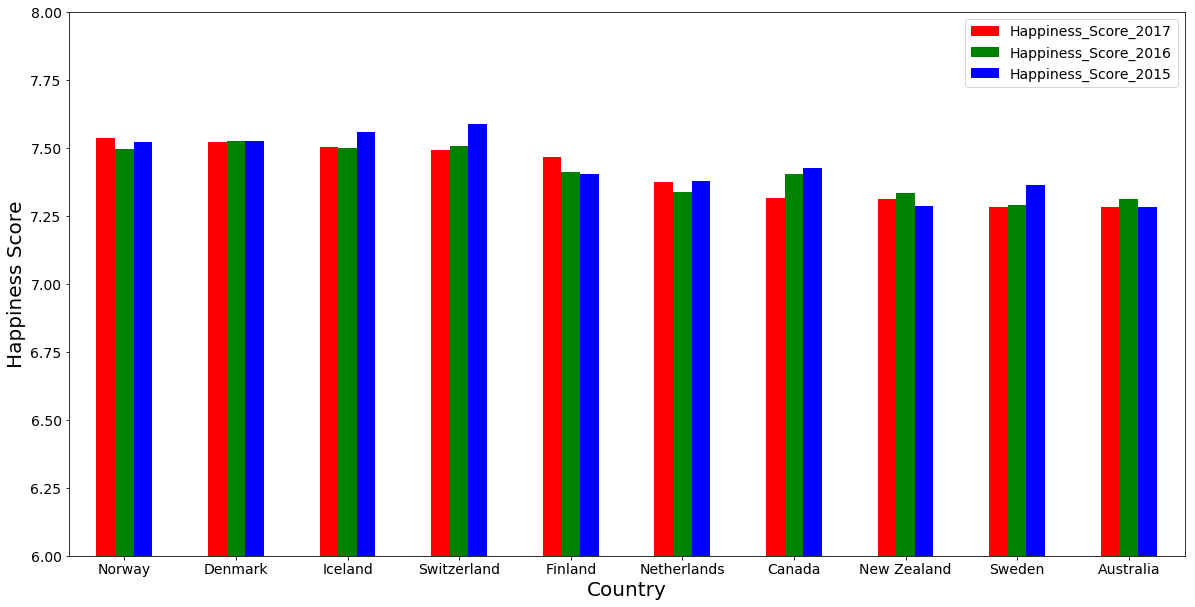

In [24]:
fig = happ_scr_over_time.sort_values(by=['Happiness_Score_2017'], 
                                     ascending = False)[['Happiness_Score_2017', 'Happiness_Score_2016', 
                                                         'Happiness_Score_2015']].iloc[0:10].plot.bar(figsize=(20,10),
                                                                            color=['red', 'green', 'blue'],rot=0)
fig.set_ylim([6,8])
fig.set_ylabel('Happiness Score',fontsize=20)
fig.set_xlabel('Country',fontsize=20)
fig.tick_params(axis='both', labelsize=14)
fig.legend(fontsize=14)

#### Visualization 4: World Happiness Rank for Top 10 Happiest Countries (2015-2017)

In [25]:
rank_table = happ_rnk_over_time.sort_values(by=['Happiness_Rank_2017']).iloc[0:10]
rank_table[['Happiness_Rank_2015','Happiness_Rank_2016',
            'Happiness_Rank_2017','Difference_2015_2017']] = rank_table[['Happiness_Rank_2015','Happiness_Rank_2016',
                                                  'Happiness_Rank_2017','Difference_2015_2017']].astype(int)
                                                 
rank_table = rank_table.rename(columns={'Happiness_Rank_2015':'Rank_2015',
                                        'Happiness_Rank_2016':'Rank_2016',
                                        'Happiness_Rank_2017':'Rank_2017',
                                        'Difference_2015_2017':'Rank_Diff'})

diff_table_2 = pd.concat([rank_table.Rank_2017, rank_table.Rank_2015],axis=1)
diff_table_2 = diff_table_2.diff(axis=1)

rank_table['Rank_Diff'] = diff_table_2['Rank_2015']
rank_table

,Rank_2015,Rank_2016,Rank_2017,Rank_Diff,Continent
Norway,4,4,1,3.000,Europe
Denmark,3,1,2,1.000,Europe
Iceland,2,3,3,-1.000,Europe
Switzerland,1,2,4,-3.000,Europe
Finland,6,5,5,1.000,Europe
Netherlands,7,7,6,1.000,Europe
Canada,5,6,7,-2.000,North America
New Zealand,9,8,8,1.000,Oceania
Sweden,8,10,9,-1.000,Europe
Australia,10,9,10,0.000,Oceania


#### Visualization 5: Sub-factors of Happiness Score in the top ten happiest countries (2017)

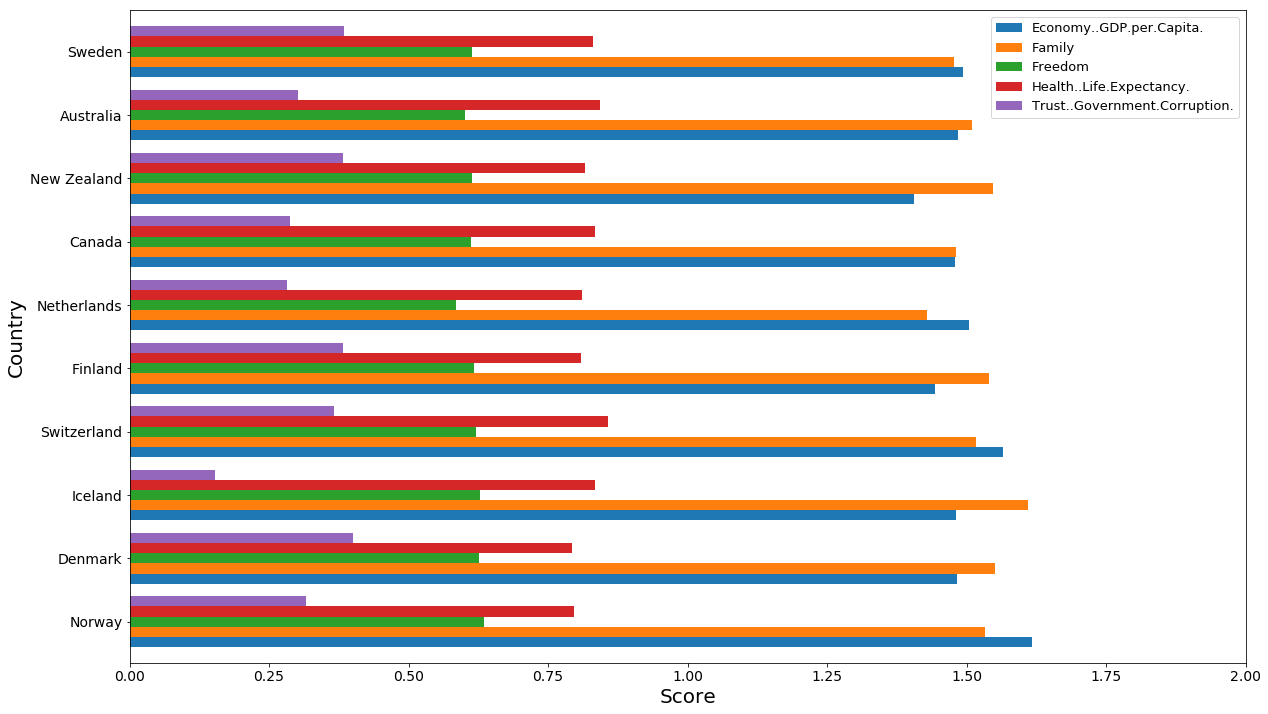

In [26]:
fig = df_2017.sort_values(by=['Happiness.Score'], 
                          ascending = False)[['Economy..GDP.per.Capita.',
                                            'Family', 'Freedom', 'Health..Life.Expectancy.', 
                                            'Trust..Government.Corruption.']].iloc[0:10].plot.barh(figsize=(20,12), 
                                                                                                rot=0, width=0.8)


fig.set_xlim([0,2])
fig.set_ylabel('Country',fontsize=20)
fig.set_xlabel('Score',fontsize=20)
fig.tick_params(axis='both', labelsize=14)
fig.legend(fontsize=13)

#### Visualization 6: Sub-factors of Happiness Score in the top ten happiest countries (2017)

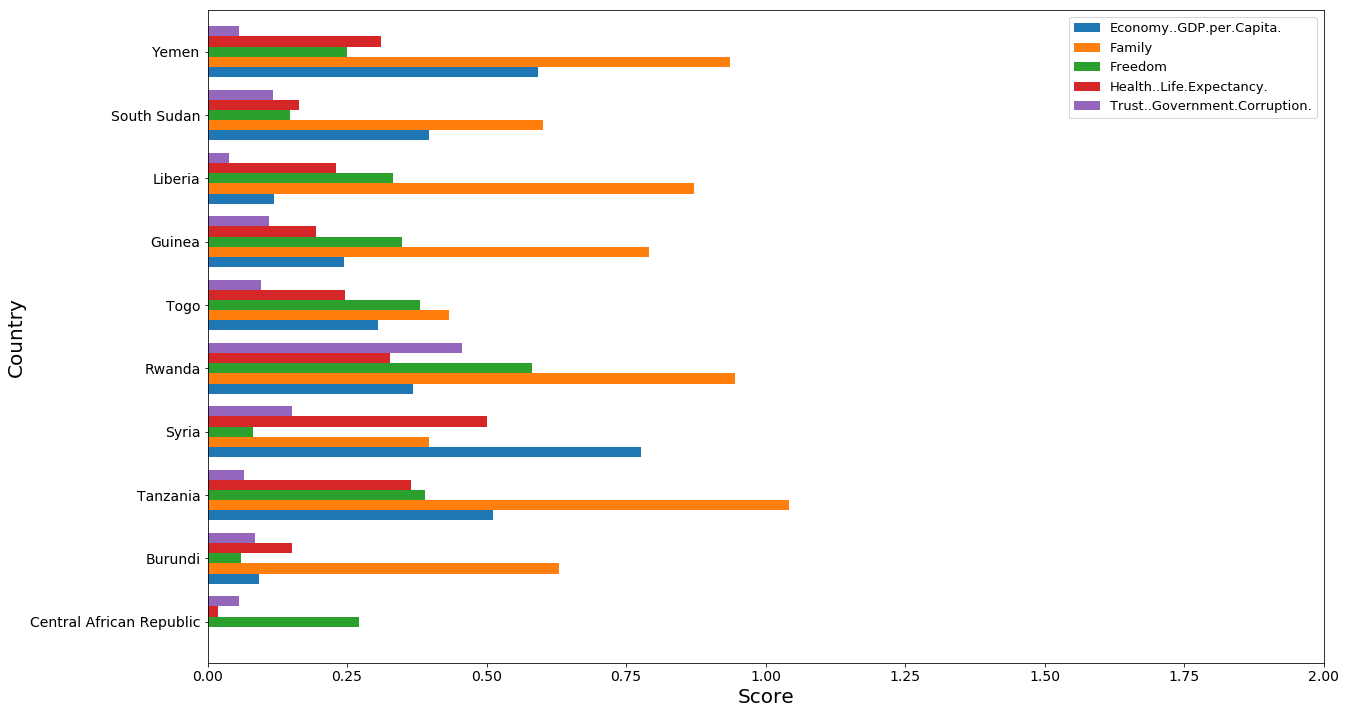

In [27]:
fig = df_2017.sort_values(by=['Happiness.Score'], 
                          ascending = True)[['Economy..GDP.per.Capita.',
                                            'Family', 'Freedom', 'Health..Life.Expectancy.', 
                                            'Trust..Government.Corruption.']].iloc[0:10].plot.barh(figsize=(20,12), 
                                                                                                rot=0, width=0.8)


fig.set_xlim([0,2])
fig.set_ylabel('Country',fontsize=20)
fig.set_xlabel('Score',fontsize=20)
fig.tick_params(axis='both', labelsize=14)
fig.legend(fontsize=13)

## Section 3 - How have Happiness Scores changed on a continental basis?

#### Visualization 7: Happiness Score by continent (2015-2017)

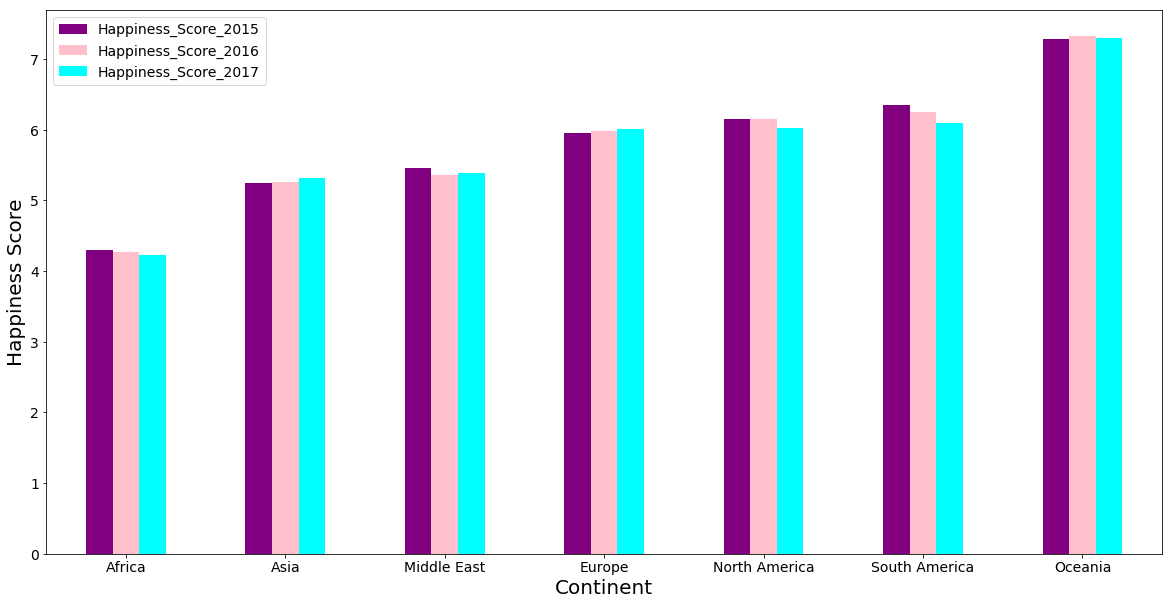

In [28]:
happ_cont_2015 = happ_scr_over_time.Happiness_Score_2015.groupby(happ_scr_over_time.Continent)
happ_cont_2016 = happ_scr_over_time.Happiness_Score_2016.groupby(happ_scr_over_time.Continent)
happ_cont_2017 = happ_scr_over_time.Happiness_Score_2017.groupby(happ_scr_over_time.Continent)

mean_happ = pd.concat([happ_cont_2015.mean(), happ_cont_2016.mean(), happ_cont_2017.mean()], axis=1)
fig = mean_happ.sort_values(by='Happiness_Score_2017').plot.bar(figsize=(20,10), color=['purple', 'pink', 'cyan'],rot=0)
fig.set_ylabel('Happiness Score')

fig.set_ylabel('Happiness Score',fontsize=20)
fig.set_xlabel('Continent',fontsize=20)
fig.tick_params(axis='both', labelsize=14)
fig.legend(fontsize=14)

## Section 5 - Which countries have seen the largest change in Happiness Score?

#### Visualization 8: Difference in Happiness Score for the ten countries with the largest drops in Happiness Score (2015-2017)

In [29]:
diff_happ_over_time = pd.concat([df_2015.sort_values(by=['Happiness Score'])['Happiness Score'], df_2017['Happiness.Score']], axis=1, sort=False).diff(axis=1)
diff_econ_over_time = pd.concat([df_2015['Economy (GDP per Capita)'], df_2017['Economy..GDP.per.Capita.']], axis=1, sort=False).diff(axis=1)
diff_fam_over_time = pd.concat([df_2015['Family'], df_2017['Family']], axis=1, sort=False).diff(axis=1)
diff_free_over_time = pd.concat([df_2015['Freedom'], df_2017['Freedom']], axis=1, sort=False).diff(axis=1)
diff_health_over_time = pd.concat([df_2015['Health (Life Expectancy)'], df_2017['Health..Life.Expectancy.']], axis=1, sort=False).diff(axis=1)
diff_trust_over_time = pd.concat([df_2015['Trust (Government Corruption)'], df_2017['Trust..Government.Corruption.']], axis=1, sort=False).diff(axis=1)
diff_table = pd.concat([diff_happ_over_time.iloc[:,1], diff_econ_over_time.iloc[:,1], diff_fam_over_time.iloc[:,1], diff_free_over_time.iloc[:,1],
                      diff_health_over_time.iloc[:,1], diff_trust_over_time.iloc[:,1]], axis=1, sort=False)

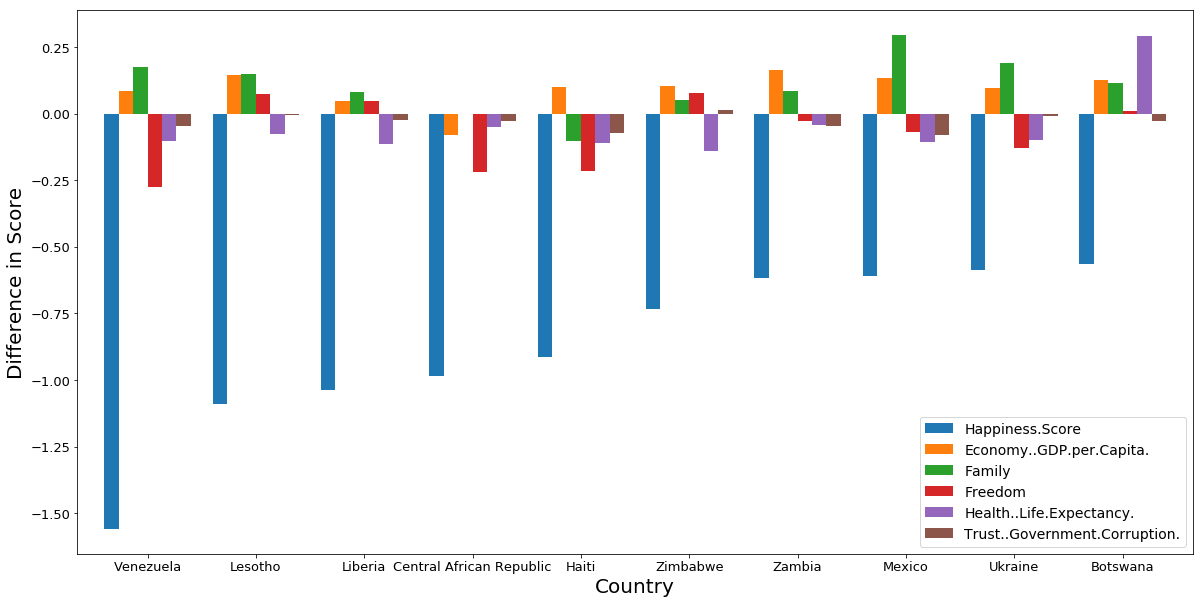

In [30]:
fig = diff_table.sort_values(by=['Happiness.Score'],ascending=True)[['Happiness.Score','Economy..GDP.per.Capita.','Family', 'Freedom', 'Health..Life.Expectancy.',
                  'Trust..Government.Corruption.']].iloc[0:10].plot.bar(figsize=(20,10),rot=0,width=0.8)


fig.set_ylabel('Difference in Score',fontsize=20)
fig.set_xlabel('Country',fontsize=20)
fig.tick_params(axis='both', labelsize=13)
fig.legend(fontsize=14)

#### Visualization 9: Difference in Happiness Score for the ten countries with the largest gains in Happiness Score (2015-2017)

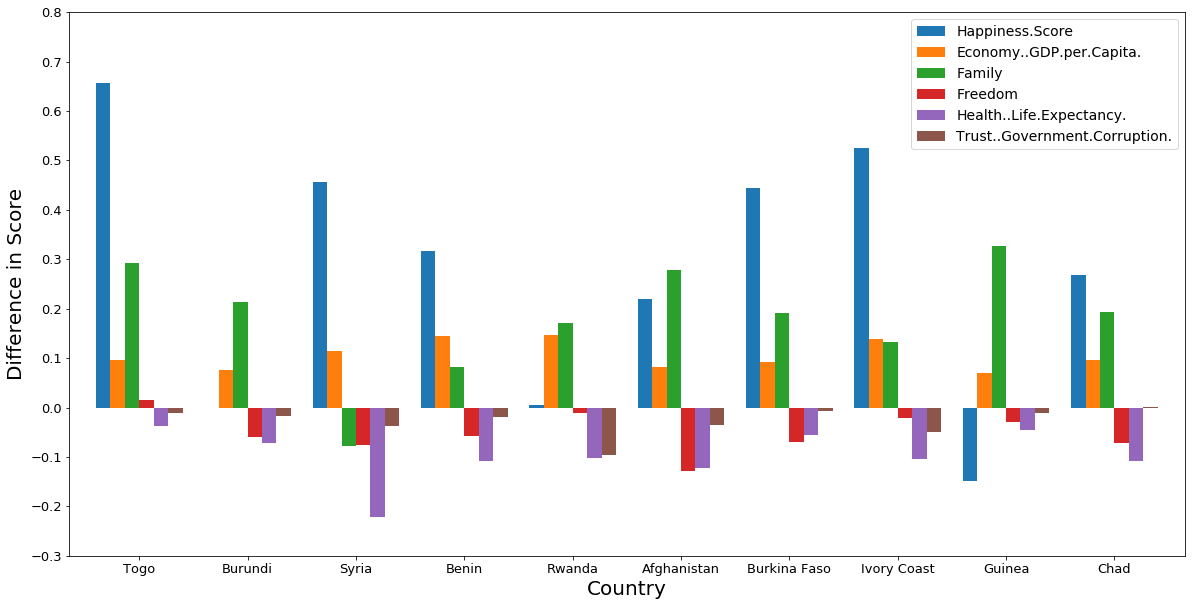

In [31]:
fig = diff_table[['Happiness.Score','Economy..GDP.per.Capita.','Family', 'Freedom', 'Health..Life.Expectancy.',
                  'Trust..Government.Corruption.']].iloc[0:10].plot.bar(figsize=(20,10),rot=0, width=0.8)

y_ticks = [-0.3,-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fig.set_yticks(y_ticks)
fig.tick_params(axis='both', labelsize=13)

fig.set_ylim([-0.3, 0.8])
fig.set_ylabel('Difference in Score',fontsize=20)
fig.set_xlabel('Country',fontsize=20)

fig.legend(fontsize=14)

## Section 6 - What is the correlation between each factor and the Happiness Score?

In [33]:
source = pd.read_csv('WorldHappinessReport.csv')
data = source.head()
data

,Country,Region,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year,Income_Status
0,Norway,Western Europe,1,7.537,1.616,1.534,0.797,0.635,0.362,0.316,2.277,2017,Wealthy
1,Denmark,Western Europe,2,7.522,1.482,1.551,0.793,0.626,0.355,0.401,2.314,2017,Wealthy
2,Iceland,Western Europe,3,7.504,1.481,1.611,0.834,0.627,0.476,0.154,2.323,2017,Wealthy
3,Switzerland,Western Europe,4,7.494,1.565,1.517,0.858,0.620,0.291,0.367,2.277,2017,Wealthy
4,Finland,Western Europe,5,7.469,1.444,1.540,0.809,0.618,0.245,0.383,2.430,2017,Wealthy


In [34]:
c = source.corr()
c

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
Happiness.Rank,1.000,-0.993,-0.791,-0.638,-0.750,-0.548,-0.146,-0.384,-0.483,-0.013
Happiness.Score,-0.993,1.000,0.785,0.637,0.748,0.560,0.164,0.406,0.490,-0.008
Economy..GDP.per.Capita.,-0.791,0.785,1.000,0.585,0.792,0.345,-0.014,0.302,0.030,0.136
Family,-0.638,0.637,0.585,1.000,0.486,0.425,0.072,0.159,-0.082,0.251
Health..Life.Expectancy.,-0.750,0.748,0.792,0.486,1.000,0.360,0.077,0.263,0.058,-0.135
Freedom,-0.548,0.560,0.345,0.425,0.360,1.000,0.343,0.490,0.038,-0.055
Generosity,-0.146,0.164,-0.014,0.072,0.077,0.343,1.000,0.287,-0.114,0.030
Trust..Government.Corruption.,-0.384,0.406,0.302,0.159,0.263,0.490,0.287,1.000,0.000,-0.074
Dystopia.Residual,-0.483,0.490,0.030,-0.082,0.058,0.038,-0.114,0.000,1.000,-0.178
Year,-0.013,-0.008,0.136,0.251,-0.135,-0.055,0.030,-0.074,-0.178,1.000


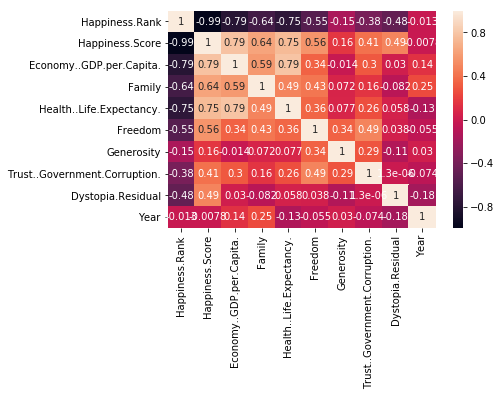

In [35]:
sns.heatmap(c, annot = True)

In [36]:
mask = np.ones_like(c, dtype = np.bool)
mask  = np.triu(mask)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

#### Visualization 10: Correlation Heat Map (2015-2017)

Text(0.5,1,'Correlations for Each Factor Globally')

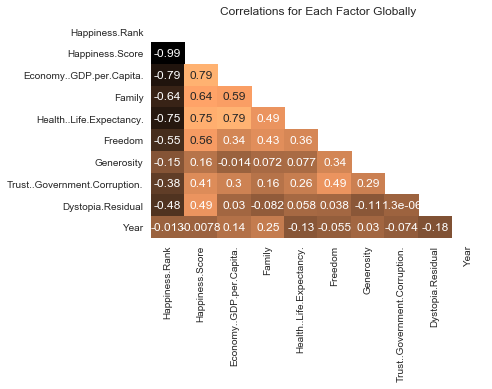

In [37]:
# Final Visualization
sns.set(style = 'white')
sns.heatmap(c, annot = True, mask = mask, cmap = 'copper', cbar = False)
plt.title("Correlations for Each Factor Globally")

## Section 7 - How does GDP per Capita contribute to Happiness for different countries around the world?

#### Visualization 12: Regression & Scatter Plot Globally 

In [38]:
source = pd.read_csv('WorldHappinessReport.csv')

Text(0.5,1,'GDP per Capita vs. Happiness Score Globally')

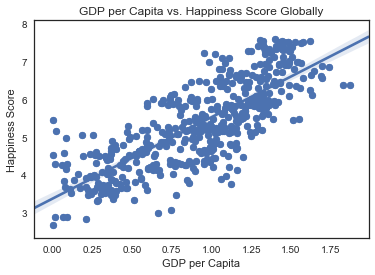

In [39]:
plt.scatter('Economy..GDP.per.Capita.','Happiness.Score',  data = source)
x = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = source)
x.set_xlabel('GDP per Capita')
x.set_ylabel('Happiness Score')
plt.title("GDP per Capita vs. Happiness Score Globally")

#### Visualization 11: Separating Poor, Rich, & Middle-Income Countries

Text(0.5,1,'Histogram of GDP per Capita')

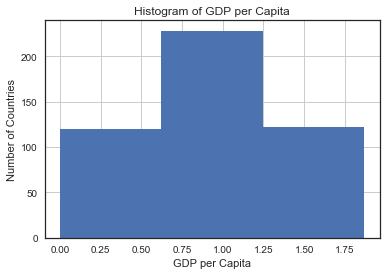

In [48]:
x = source['Economy..GDP.per.Capita.'].hist(bins = 3)
x.set_xlabel('GDP per Capita')
x.set_ylabel('Number of Countries')
plt.title("Histogram of GDP per Capita")
#x.set_xlabel('Contribution Amount ($)')
#x.set_ylabel('Number of Donors')
#plt.title("Distribution of Campaign Contribution Amounts (2016)")

#### Visualization 13: Regression & Scatter Plot for Rich Countries

In [40]:
a = source[source.Income_Status == 'Wealthy']
b = source[source.Income_Status == 'Middle Income']
c = source[source.Income_Status == 'Poor']

(2, 9)

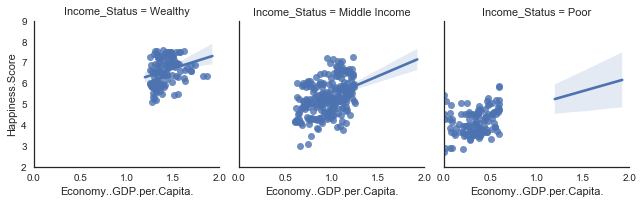

In [41]:
g = sns.FacetGrid(source, col="Income_Status")
g.map(sns.regplot, 'Economy..GDP.per.Capita.','Happiness.Score')
plt.xlim(0, 2)
plt.ylim(2, 9)

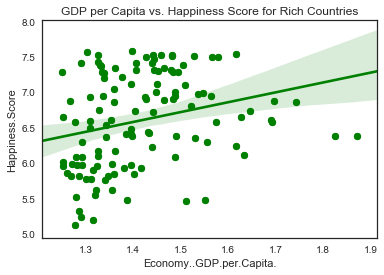

In [42]:
Rich = plt.scatter('Economy..GDP.per.Capita.','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("GDP per Capita vs. Happiness Score for Rich Countries")
sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a, color = 'green')

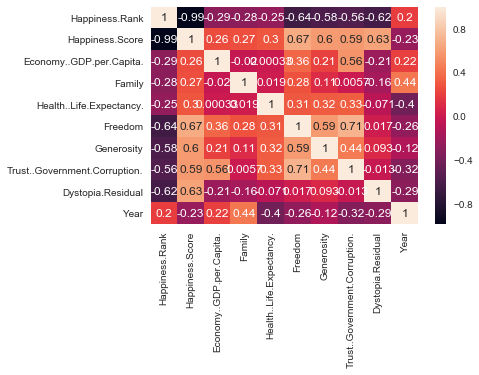

In [43]:
rich_c = a.corr()
sns.heatmap(rich_c, annot = True)

Text(0.5,1,'GDP per Capita vs. Happiness Score for Middle-Income Countries')

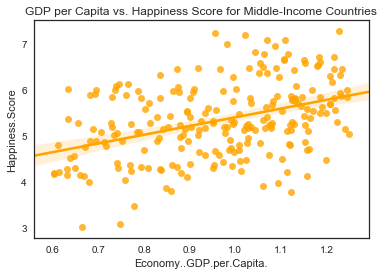

In [44]:
#plt.scatter('Economy..GDP.per.Capita.','Happiness.Score',  data = b)
Mid_Inc = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = b, color = 'orange')
plt.title("GDP per Capita vs. Happiness Score for Middle-Income Countries")

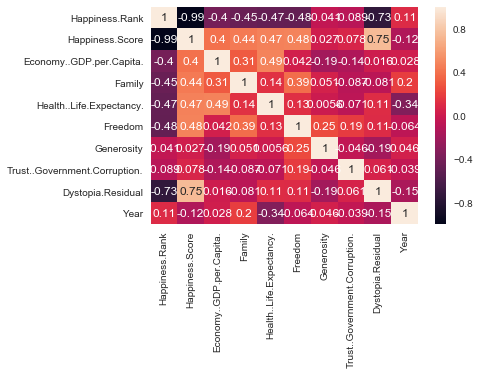

In [14]:
mid_c = b.corr()
sns.heatmap(mid_c, annot = True)

Text(0.5,1,'GDP per Capita vs. Happiness Score for Poor Countries')

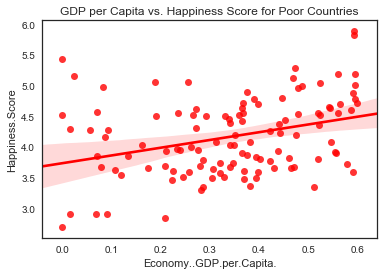

In [45]:
#plt.scatter('Economy..GDP.per.Capita.','Happiness.Score',  data = c)
Poor = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = c, color = 'red')
plt.title("GDP per Capita vs. Happiness Score for Poor Countries")

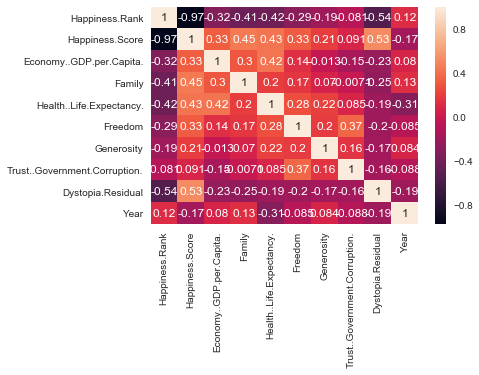

In [46]:
poor_c = c.corr()
sns.heatmap(poor_c, annot = True)

## Section 8 - How does Health (Life Expectancy) contribute to Happiness for different countries around the world?

#### Visualization 14: Regression & Scatter Plot Globally 

Text(0.5,1,'Health vs. Happiness Score Globally')

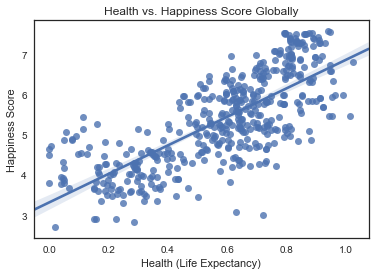

In [47]:
x = sns.regplot('Health..Life.Expectancy.','Happiness.Score',  data = source)
x.set_xlabel('Health (Life Expectancy)')
x.set_ylabel('Happiness Score')
plt.title("Health vs. Happiness Score Globally")

#### Visualization 15: Regression & Scatter Plot for Rich Countries

Text(0.5,1,'Life Expectancy vs. Happiness Score for Wealthy Countries')

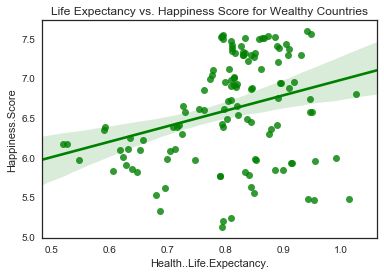

In [48]:
sns.regplot('Health..Life.Expectancy.','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("Life Expectancy vs. Happiness Score for Wealthy Countries")

Text(0.5,1,'Life Expectancy vs. Happiness Score for Middle-Income Countries')

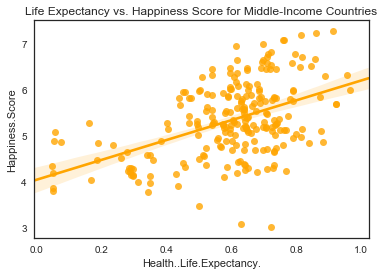

In [49]:
sns.regplot('Health..Life.Expectancy.','Happiness.Score',  data = b, color = 'orange')
plt.title("Life Expectancy vs. Happiness Score for Middle-Income Countries")

Text(0.5,1,'Life Expectancy vs. Happiness Score for Poor Countries')

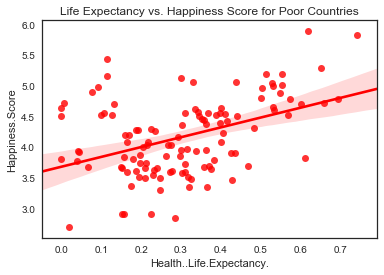

In [50]:
sns.regplot('Health..Life.Expectancy.','Happiness.Score',  data = c, color = 'red')
plt.title("Life Expectancy vs. Happiness Score for Poor Countries")

## Section 9 - How does Family contribute to Happiness for different countries around the world?

#### Visualization 16: Regression & Scatter Plot Globally 

Text(0.5,1,'Family vs. Happiness Score Globally')

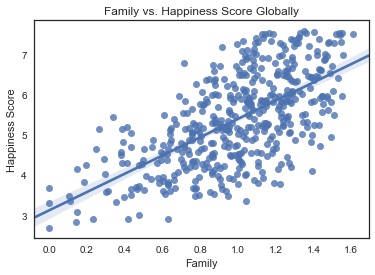

In [51]:
x = sns.regplot('Family','Happiness.Score',  data = source)
x.set_xlabel('Family')
x.set_ylabel('Happiness Score')
plt.title("Family vs. Happiness Score Globally")

Text(0.5,1,'Family vs. Happiness Score for Wealthy Countries')

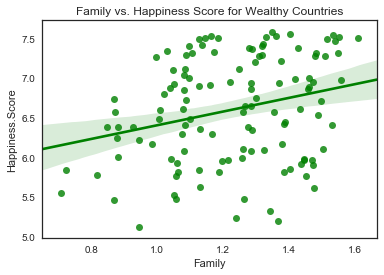

In [52]:
sns.regplot('Family','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("Family vs. Happiness Score for Wealthy Countries")

Text(0.5,1,'Family vs. Happiness Score for Middle-Income Countries')

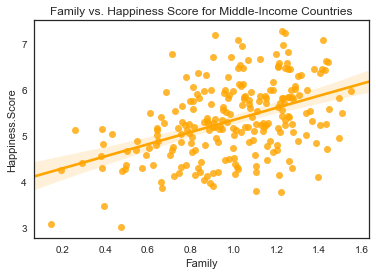

In [53]:
sns.regplot('Family','Happiness.Score',  data = b, color = 'orange')
plt.title("Family vs. Happiness Score for Middle-Income Countries")

Text(0.5,1,'Family vs. Happiness Score for Poor Countries')

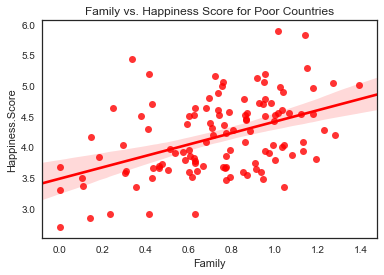

In [54]:
sns.regplot('Family','Happiness.Score',  data = c, color = 'red')
plt.title("Family vs. Happiness Score for Poor Countries")

## Section 10 - How does Freedom contribute to Happiness for different countries around the world?

#### Visualization 18: Regression & Scatter Plot Globally 

Text(0.5,1,'Freedom vs. Happiness Score Globally')

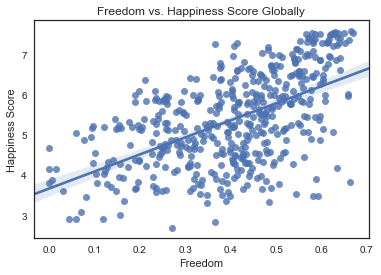

In [56]:
x = sns.regplot('Freedom','Happiness.Score',  data = source)
x.set_xlabel('Freedom')
x.set_ylabel('Happiness Score')
plt.title("Freedom vs. Happiness Score Globally")

Text(0.5,1,'Freedom vs. Happiness Score for Wealthy Countries')

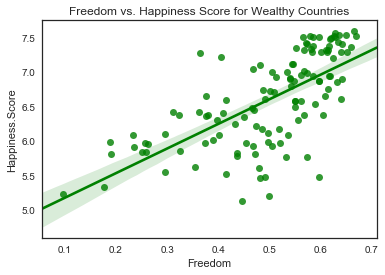

In [57]:
sns.regplot('Freedom','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("Freedom vs. Happiness Score for Wealthy Countries")

Text(0.5,1,'Freedom vs. Happiness Score for Middle-Income Countries')

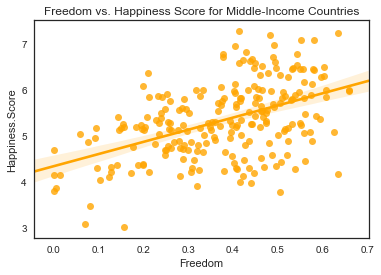

In [58]:
sns.regplot('Freedom','Happiness.Score',  data = b, color = 'orange')
plt.title("Freedom vs. Happiness Score for Middle-Income Countries")

Text(0.5,1,'Freedom vs. Happiness Score for Poor Countries')

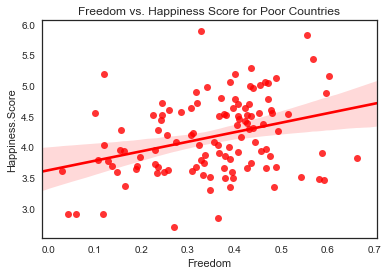

In [59]:
sns.regplot('Freedom','Happiness.Score',  data = c, color = 'red')
plt.title("Freedom vs. Happiness Score for Poor Countries")

## Section 11 - How does Generosity contribute to Happiness for different countries around the world?

#### Visualization 18: Regression & Scatter Plot Globally 

Text(0.5,1,'Generosity vs. Happiness Score Globally')

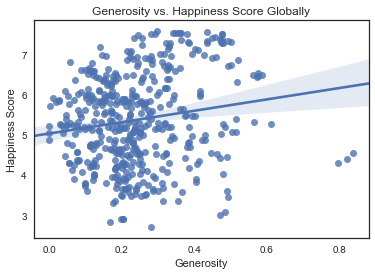

In [60]:
x = sns.regplot('Generosity','Happiness.Score',  data = source)
x.set_xlabel('Generosity')
x.set_ylabel('Happiness Score')
plt.title("Generosity vs. Happiness Score Globally")

Text(0.5,1,'Generosity vs. Happiness Score for Wealthy Countries')

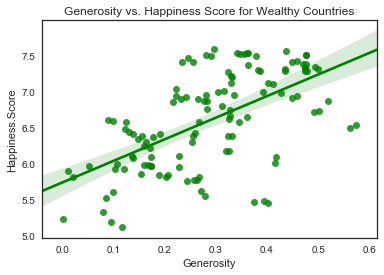

In [61]:
sns.regplot('Generosity','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("Generosity vs. Happiness Score for Wealthy Countries")

Text(0.5,1,'Generosity vs. Happiness Score for Middle-Income Countries')

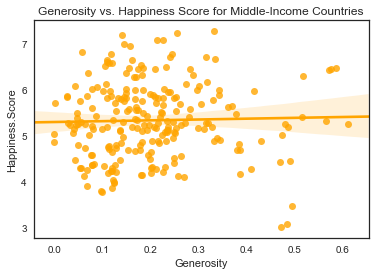

In [62]:
sns.regplot('Generosity','Happiness.Score',  data = b, color = 'orange')
plt.title("Generosity vs. Happiness Score for Middle-Income Countries")

Text(0.5,1,'Generosity vs. Happiness Score for Poor Countries')

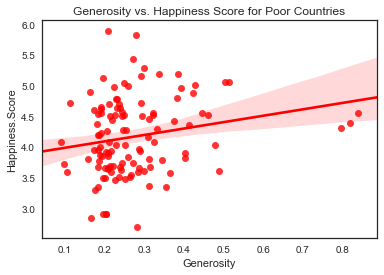

In [63]:
sns.regplot('Generosity','Happiness.Score',  data = c, color = 'red')
plt.title("Generosity vs. Happiness Score for Poor Countries")

## Section 12 - How does Trust in Government contribute to Happiness for different countries around the world?

#### Visualization 22: Regression & Scatter Plot Globally 

Text(0.5,1,'Trust in Government vs. Happiness Score Globally')

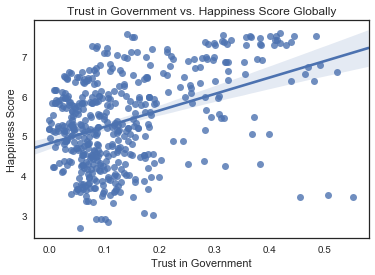

In [65]:
x = sns.regplot('Trust..Government.Corruption.','Happiness.Score',  data = source)
x.set_xlabel('Trust in Government')
x.set_ylabel('Happiness Score')
plt.title("Trust in Government vs. Happiness Score Globally")

Text(0.5,0,'Trust in Government')

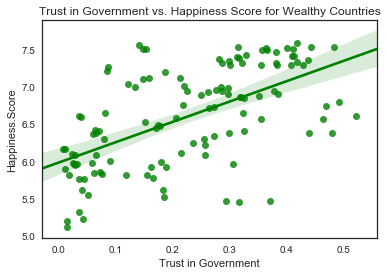

In [66]:
x = sns.regplot('Trust..Government.Corruption.','Happiness.Score',  data = a, color = 'green')
#Rich = sns.regplot('Economy..GDP.per.Capita.','Happiness.Score',  data = a)
plt.title("Trust in Government vs. Happiness Score for Wealthy Countries")
x.set_xlabel('Trust in Government')

Text(0.5,0,'Trust in Government')

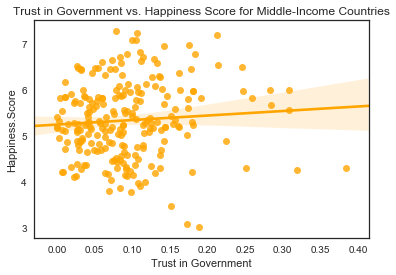

In [67]:
x = sns.regplot('Trust..Government.Corruption.','Happiness.Score',  data = b, color = 'orange')
plt.title("Trust in Government vs. Happiness Score for Middle-Income Countries")
x.set_xlabel('Trust in Government')

Text(0.5,0,'Trust in Government')

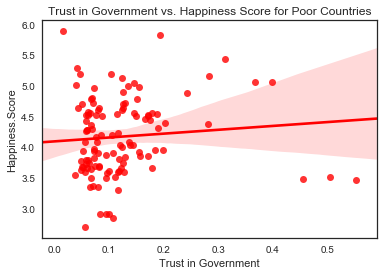

In [68]:
x = sns.regplot('Trust..Government.Corruption.','Happiness.Score',  data = c, color = 'red')
plt.title("Trust in Government vs. Happiness Score for Poor Countries")
x.set_xlabel('Trust in Government')

In [69]:
wealthy = a.corr()

In [70]:
mid_income = b.corr()

In [71]:
poor = c.corr()

In [76]:
a = source[source.Income_Status == 'Wealthy']
b = source[source.Income_Status == 'Middle Income']
c = source[source.Income_Status == 'Poor']
wealthy = a.corr()
mid_income = b.corr()
poor = c.corr()
globe_c = source.corr()
wealthy.groupby('Happiness.Score')
w = wealthy.loc['Happiness.Score'].reset_index(name = 'Wealthy Country Correlations')
mi = mid_income.loc['Happiness.Score'].reset_index(name = 'Middle Income Country Correlations')
p = poor.loc['Happiness.Score'].reset_index(name = 'Poor Country Correlations')
merged_tables = pd.merge(w, mi, on = 'index')
merged_tables2 = pd.merge(merged_tables, p, on = 'index')
world = globe_c.loc['Happiness.Score'].reset_index(name = 'Global Correlations')
merged_tables_final = pd.merge(merged_tables2, world, on = 'index')
merged_tables_final

,index,Wealthy Country Correlations,Middle Income Country Correlations,Poor Country Correlations,Global Correlations
0,Happiness.Rank,-0.985,-0.994,-0.969,-0.993
1,Happiness.Score,1.000,1.000,1.000,1.000
2,Economy..GDP.per.Capita.,0.263,0.405,0.334,0.785
3,Family,0.268,0.442,0.453,0.637
4,Health..Life.Expectancy.,0.300,0.474,0.427,0.748
5,Freedom,0.671,0.479,0.328,0.560
6,Generosity,0.595,0.027,0.206,0.164
7,Trust..Government.Corruption.,0.585,0.078,0.091,0.406
8,Dystopia.Residual,0.632,0.750,0.530,0.490
9,Year,-0.234,-0.121,-0.174,-0.008


In [73]:
wealthy.groupby('Happiness.Score')

In [77]:
one = source[source.Year == 2015]
first = one['Income_Status'].value_counts().reset_index(name = '2015')
two = source[source.Year == 2016]
second = two['Income_Status'].value_counts().reset_index(name = '2016')
three = source[source.Year == 2017]
third = three['Income_Status'].value_counts().reset_index(name = '2017')
year_merge1 = pd.merge(first, second, on = 'index')
year_merge2 = pd.merge(year_merge1, third, on = 'index')
year_merge2
#y = source['Income_Status'].value_counts()
#y


,index,2015,2016,2017
0,Middle Income,82,79,72
1,Poor,47,35,34
2,Wealthy,29,43,49
